In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats
import numpy as np
import os

In [2]:
plt.rc('legend', fontsize=10)

In [3]:
# Load data files and extract spike train for each current step
# /separate runs/*.dat (NeuroML2)
dt = 0.001
ms_to_index = lambda ms: int(ms / dt)
index_to_ms = lambda ind: ind * dt
threshold = -0.025

dat_files = [f for f in os.listdir('separate runs') if os.path.isfile(os.path.join('separate runs', f)) and os.path.splitext(f)[1] == '.dat']
currents = np.array([float(f[:-6]) for f in dat_files])  # pA
spike_trains = []
for f in dat_files:
    t, v, i = np.genfromtxt(os.path.join('separate runs', f)).transpose()
    spike_trains.append(v)

In [4]:
# Extract spike times via voltage threshold
spike_times = []
for spike_train in spike_trains:
    current_spike_times = []
    for i in range(spike_train.size-1):
        if spike_train[i] < threshold and spike_train[i+1] >= threshold:
            current_spike_times.append(index_to_ms(i))
    spike_times.append(np.array(current_spike_times))
#spike_times

In [5]:
# Delays to first spike
delays = [times[0] - 10 if len(t) > 0 else np.nan for times in spike_times]  # current pulse starts at 10 ms
#delays

In [6]:
#fit_delays = np.poly1d(np.polyfit(currents+12, delays, 3))

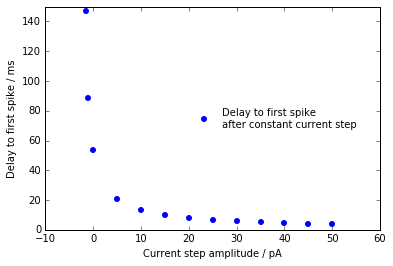

In [9]:
plt.errorbar(currents, delays, fmt='o', capsize=7, markeredgecolor='none', label='Delay to first spike\nafter constant current step')  #yerr=0.001,
plt.xlim(-10, 60)
plt.ylim(0, 150)
plt.xlabel('Current step amplitude / pA')
plt.ylabel('Delay to first spike / ms')
#plt.axvline(-1.90+12, label="Rheobase (silence -> tonic)", color='b', alpha=0.6)
#plt.text(7, 128, '10.10 pA', color='b', rotation=90)
plt.legend(loc='center right', numpoints=1, borderaxespad=2, frameon=False)

# Does the fit imply something here?
#x = np.linspace(0, 70)
#plt.plot(x, fit_delays(x), 'black', linewidth=0.3)

plt.savefig("delay.png", dpi=300)